##  Explore & Understand - Load data, check data types, understand churn distribution

First 5 rows:
  CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
0     C00001       6              64          1540        One year   
1     C00002      21             113          1753  Month-to-month   
2     C00003      27              31          1455        Two year   
3     C00004      53              29          7150  Month-to-month   
4     C00005      16             185          1023        One year   

      PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
0       Credit Card               No              1      0  
1  Electronic Check              Yes              1      0  
2       Credit Card               No              1      0  
3  Electronic Check               No              1      0  
4  Electronic Check               No              1      0   

Last 5 rows:
    CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
495     C00496      50             128          6970  Month-to-month   
496     C00497       2              49  

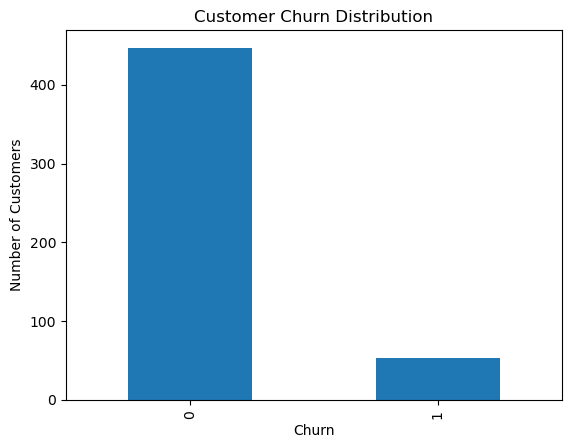

In [1]:
# ==========================================
# EXPLORE & UNDERSTAND DATA – CUSTOMER CHURN
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 1. Load the data
df = pd.read_csv("customer_churn (3).csv")

# 2. View first and last rows
print("First 5 rows:")
print(df.head(), "\n")

print("Last 5 rows:")
print(df.tail(), "\n")

# 3. Check dataset shape
print("Dataset shape (rows, columns):")
print(df.shape, "\n")

# 4. Check column names
print("Column names:")
print(df.columns.tolist(), "\n")

# 5. Check data types
print("Data types:")
print(df.dtypes, "\n")

# 6. Check missing values
print("Missing values per column:")
print(df.isnull().sum(), "\n")

# 7. Basic statistical summary (numerical columns)
print("Statistical summary:")
print(df.describe(), "\n")

# 8. Understand churn distribution
print("Churn value counts:")
print(df['Churn'].value_counts(), "\n")

print("Churn percentage distribution:")
print(df['Churn'].value_counts(normalize=True) * 100)

# 9. Visualize churn distribution
plt.figure()
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution")
plt.show()


## Handle Categorical Data - Apply Label Encoding and One-Hot Encoding

In [2]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("customer_churn (3).csv")

In [3]:
df.head()

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


In [4]:
# Identify categorical columns
# ----------------------------------------------------------
# 'object' dtype usually represents categorical data
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)

Categorical Columns: Index(['CustomerID', 'Contract', 'PaymentMethod', 'PaperlessBilling'], dtype='object')


In [5]:
# Handle missing values in categorical columns
# ----------------------------------------------------------
# Fill missing values with 'Unknown' to avoid encoding errors
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

In [6]:
# LABEL ENCODING
# ----------------------------------------------------------
# Label Encoding is suitable for:
# - Binary categories
# - Ordinal data (where order matters)
#
# Example: Churn -> Yes / No

label_encoder = LabelEncoder()

# Apply Label Encoding to Churn column
df['Churn_encoded'] = label_encoder.fit_transform(df['Churn'])

# Check mapping
print("Churn Encoding Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Churn Encoding Mapping:
{0: 0, 1: 1}


In [7]:
# ONE-HOT ENCODING
# ----------------------------------------------------------
# One-Hot Encoding is suitable for:
# - Nominal data (no order)
# Example: Gender, PaymentMethod, Contract

# Select nominal categorical columns (exclude Churn)
# Safely remove Churn if it exists
nominal_cols = cat_cols.drop('Churn', errors='ignore')


# Apply One-Hot Encoding
df_encoded = pd.get_dummies(
    df,
    columns=nominal_cols,
    drop_first=True  # Avoids dummy variable trap
)

In [8]:
# Verify the encoded dataset
# ----------------------------------------------------------
print("Encoded DataFrame Preview:")
print(df_encoded.head())

print("\nUpdated Data Types:")
print(df_encoded.dtypes)

Encoded DataFrame Preview:
   Tenure  MonthlyCharges  TotalCharges  SeniorCitizen  Churn  Churn_encoded  \
0       6              64          1540              1      0              0   
1      21             113          1753              1      0              0   
2      27              31          1455              1      0              0   
3      53              29          7150              1      0              0   
4      16             185          1023              1      0              0   

   CustomerID_C00002  CustomerID_C00003  CustomerID_C00004  CustomerID_C00005  \
0              False              False              False              False   
1               True              False              False              False   
2              False               True              False              False   
3              False              False               True              False   
4              False              False              False               True   

   ..

In [9]:
## Check if any categorical columns remain
# ----------------------------------------------------------
remaining_cat_cols = df_encoded.select_dtypes(include=['object']).columns
print("Remaining Categorical Columns:", remaining_cat_cols)


Remaining Categorical Columns: Index([], dtype='object')


In [10]:
## Save the encoded dataset (optional)
# ----------------------------------------------------------
df_encoded.to_csv("customer_churn_encoded.csv", index=False)

print("\nEncoding completed successfully!")


Encoding completed successfully!


## Feature Scaling - Apply Min-Max and Standard scaling, compare effects

In [11]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Load dataset
df = pd.read_csv("customer_churn (3).csv")

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", num_cols.tolist())


Numerical Columns: ['Tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']


In [12]:
# Create a copy for Min-Max Scaling
df_minmax = df.copy()

minmax_scaler = MinMaxScaler()
df_minmax[num_cols] = minmax_scaler.fit_transform(df[num_cols])

# Check results
print("Min-Max Scaled Data (Summary):")
print(df_minmax[num_cols].describe())

Min-Max Scaled Data (Summary):
           Tenure  MonthlyCharges  TotalCharges  SeniorCitizen       Churn
count  500.000000      500.000000    500.000000     500.000000  500.000000
mean     0.507600        0.523106      0.520730       0.498000    0.106000
std      0.295244        0.289385      0.288602       0.500497    0.308146
min      0.000000        0.000000      0.000000       0.000000    0.000000
25%      0.257143        0.262570      0.265320       0.000000    0.000000
50%      0.514286        0.530726      0.513660       0.000000    0.000000
75%      0.757143        0.770950      0.779746       1.000000    0.000000
max      1.000000        1.000000      1.000000       1.000000    1.000000


In [13]:
# Create a copy for Standard Scaling
df_standard = df.copy()

standard_scaler = StandardScaler()
df_standard[num_cols] = standard_scaler.fit_transform(df[num_cols])

# Check results
print("Standard Scaled Data (Summary):")
print(df_standard[num_cols].describe())

Standard Scaled Data (Summary):
             Tenure  MonthlyCharges  TotalCharges  SeniorCitizen         Churn
count  5.000000e+02    5.000000e+02  5.000000e+02   5.000000e+02  5.000000e+02
mean   1.731948e-16    8.881784e-17  1.767475e-16  -6.750156e-17  4.440892e-17
std    1.001002e+00    1.001002e+00  1.001002e+00   1.001002e+00  1.001002e+00
min   -1.720980e+00   -1.809459e+00 -1.806127e+00  -9.960080e-01 -3.443374e-01
25%   -8.491562e-01   -9.012122e-01 -8.858790e-01  -9.960080e-01 -3.443374e-01
50%    2.266741e-02    2.635847e-02 -2.452313e-02  -9.960080e-01 -3.443374e-01
75%    8.460563e-01    8.573072e-01  8.983819e-01   1.004008e+00 -3.443374e-01
max    1.669445e+00    1.649607e+00  1.662322e+00   1.004008e+00  2.904128e+00


In [14]:
comparison = pd.DataFrame({
    'Original': df[num_cols[0]],
    'MinMax': df_minmax[num_cols[0]],
    'Standard': df_standard[num_cols[0]]
})

print(comparison.head())

   Original    MinMax  Standard
0         6  0.071429 -1.478807
1        21  0.285714 -0.752287
2        27  0.371429 -0.461679
3        53  0.742857  0.797622
4        16  0.214286 -0.994460


Comparison of Statistics for 'MonthlyCharges':
     Original    MinMax  Standard
0           6  0.071429 -1.478807
1          21  0.285714 -0.752287
2          27  0.371429 -0.461679
3          53  0.742857  0.797622
4          16  0.214286 -0.994460
..        ...       ...       ...
495        50  0.700000  0.652318
496         2  0.014286 -1.672545
497        46  0.642857  0.458579
498         1  0.000000 -1.720980
499        27  0.371429 -0.461679

[500 rows x 3 columns]


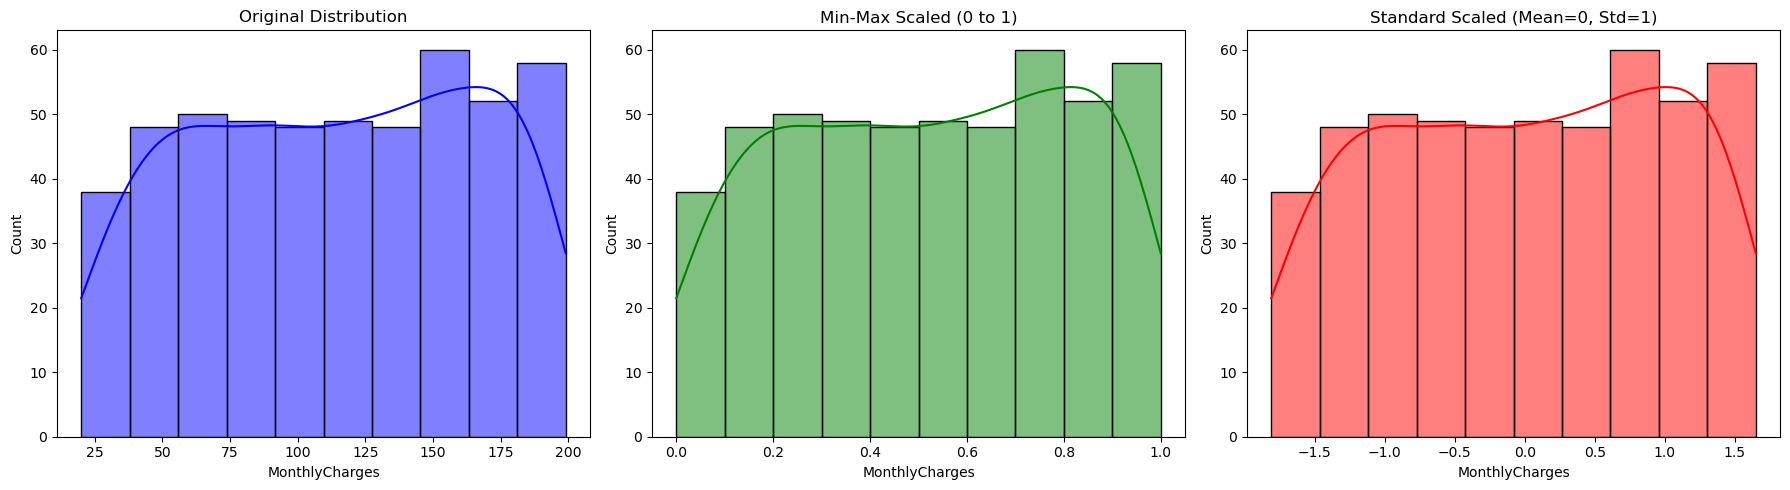

In [15]:
print("Comparison of Statistics for 'MonthlyCharges':")
print(comparison)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[0], color='blue').set_title('Original Distribution')
sns.histplot(df_minmax['MonthlyCharges'], kde=True, ax=axes[1], color='green').set_title('Min-Max Scaled (0 to 1)')
sns.histplot(df_standard['MonthlyCharges'], kde=True, ax=axes[2], color='red').set_title('Standard Scaled (Mean=0, Std=1)')

plt.tight_layout()
plt.savefig('scaling_comparison.png')

# Save files
df_minmax.to_csv('customer_churn_minmax.csv', index=False)
df_standard.to_csv('customer_churn_standard.csv', index=False)

## Outlier Detection & Handling - Identify outliers using IQR and Z-score methods

In [16]:
from scipy import stats

# Load dataset
df = pd.read_csv("customer_churn (3).csv")

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", num_cols.tolist())

Numerical Columns: ['Tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']


In [17]:
# -----------------------------
# IQR METHOD
# -----------------------------

outliers_iqr = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers_iqr[col] = outlier_rows.shape[0]
    
    print(f"{col}: {outliers_iqr[col]} outliers")

Tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers
SeniorCitizen: 0 outliers
Churn: 53 outliers


In [18]:
# -----------------------------
# Z-SCORE METHOD
# -----------------------------

outliers_zscore = {}

for col in num_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outlier_rows = df[z_scores > 3]
    
    outliers_zscore[col] = outlier_rows.shape[0]
    
    print(f"{col}: {outliers_zscore[col]} outliers")

Tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers
SeniorCitizen: 0 outliers
Churn: 0 outliers


In [19]:
comparison = pd.DataFrame({
    'IQR_Outliers': outliers_iqr,
    'ZScore_Outliers': outliers_zscore
})

print("\nOutlier Comparison:")
print(comparison)


Outlier Comparison:
                IQR_Outliers  ZScore_Outliers
Tenure                     0                0
MonthlyCharges             0                0
TotalCharges               0                0
SeniorCitizen              0                0
Churn                     53                0


In [20]:
# Remove outliers using IQR for one column (example)
col = num_cols[0]

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df[col] >= lower) & (df[col] <= upper)]

In [21]:
# Capping using IQR
df_capped = df.copy()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_capped[col] = np.where(df[col] < lower, lower,
                        np.where(df[col] > upper, upper, df[col]))

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

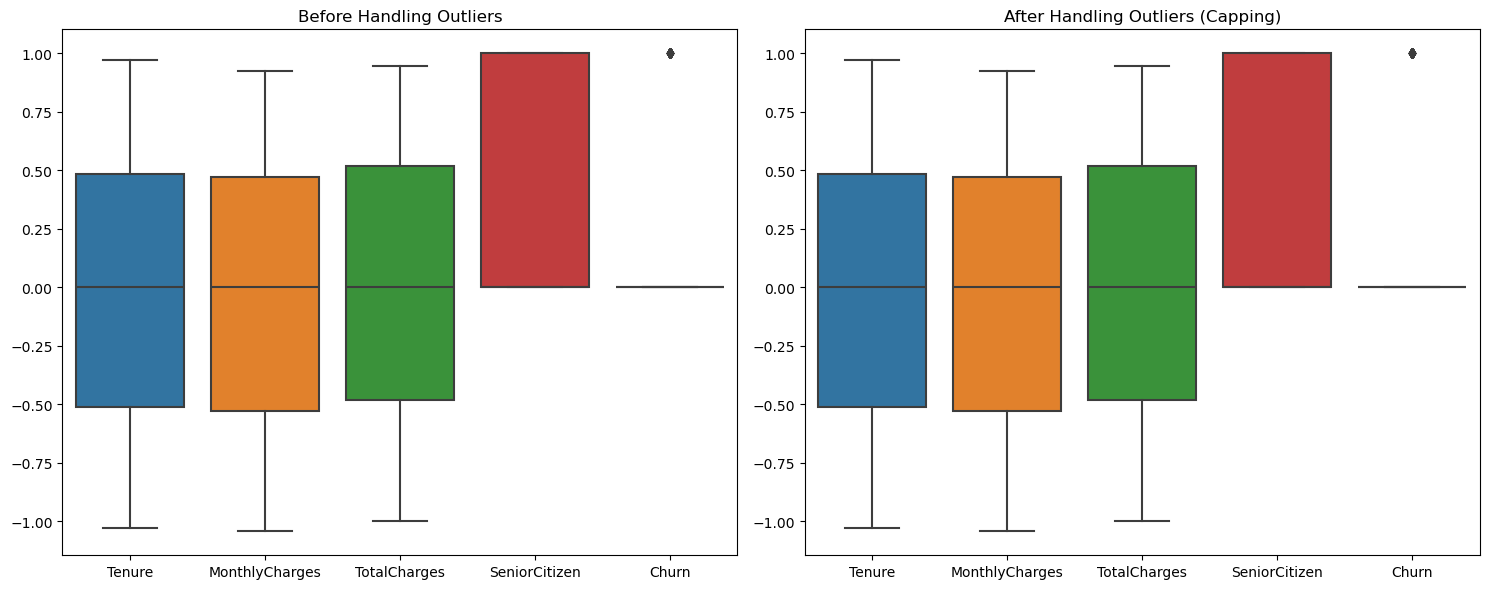

In [23]:
# Visualization: Boxplots comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=df[num_cols], ax=axes[0])
axes[0].set_title('Before Handling Outliers')

sns.boxplot(data=df[num_cols], ax=axes[1])
axes[1].set_title('After Handling Outliers (Capping)')

plt.tight_layout()
plt.savefig('outlier_detection_comparison.png')

# Save cleaned data
df.to_csv('customer_churn_outliers_handled_v2.csv', index=False)

## Feature Engineering - Create new features like Customer Lifetime Value, Payment Efficiency

In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values
df['TotalCharges'].fillna(0, inplace=True)

In [25]:
# ----------------------------------
# CUSTOMER LIFETIME VALUE (CLV)
# ----------------------------------
df['Customer_Lifetime_Value'] = df['MonthlyCharges'] * df['Tenure']

# Preview
df[['MonthlyCharges', 'Tenure', 'Customer_Lifetime_Value']].head()

,MonthlyCharges,Tenure,Customer_Lifetime_Value
0,-0.560440,-0.885714,0.496389
1,-0.021978,-0.457143,0.010047
2,-0.923077,-0.285714,0.263736
3,-0.945055,0.457143,-0.432025
4,0.769231,-0.600000,-0.461538


In [27]:
# ----------------------------------
# PAYMENT EFFICIENCY
# ----------------------------------

# Avoid division by zero
df['Expected_Payment'] = df['MonthlyCharges'] * df['Tenure']

df['Payment_Efficiency'] = np.where(
    df['Expected_Payment'] > 0,
    df['TotalCharges'] / df['Expected_Payment'],
    0
)

# Preview
df[['TotalCharges', 'Expected_Payment', 'Payment_Efficiency']].head()

,TotalCharges,Expected_Payment,Payment_Efficiency
0,-0.655789,0.496389,-1.321117
1,-0.602928,0.010047,-60.010218
2,-0.676883,0.263736,-2.566515
3,0.736444,-0.432025,0.000000
4,-0.784092,-0.461538,0.000000


In [28]:
df['Avg_Monthly_Spend'] = np.where(
    df['Tenure'] > 0,
    df['TotalCharges'] / df['Tenure'],
    0
)

In [29]:
df['Tenure_Group'] = pd.cut(
    df['Tenure'],
    bins=[0, 12, 24, 48, 100],
    labels=['0-1 Year', '1-2 Years', '2-4 Years', '4+ Years']
)

In [30]:
print(df[['Customer_Lifetime_Value',
          'Payment_Efficiency',
          'Avg_Monthly_Spend',
          'Tenure_Group']].describe())

print(df.head())

       Customer_Lifetime_Value  Payment_Efficiency  Avg_Monthly_Spend
count               500.000000          500.000000         500.000000
mean                 -0.019811            0.192141          -0.008505
std                   0.338134           27.549310           2.171515
min                  -0.885714         -212.349547         -27.643008
25%                  -0.212009            0.000000          -0.000337
50%                   0.000000            0.000000           0.000000
75%                   0.175196            0.000000           0.000000
max                   0.984301          508.141674          14.694441
  CustomerID    Tenure  MonthlyCharges  TotalCharges        Contract  \
0     C00001 -0.885714       -0.560440     -0.655789        One year   
1     C00002 -0.457143       -0.021978     -0.602928  Month-to-month   
2     C00003 -0.285714       -0.923077     -0.676883        Two year   
3     C00004  0.457143       -0.945055      0.736444  Month-to-month   
4     C000

In [31]:
# Save the dataset with new features
df.to_csv('customer_churn_feature_engineered_v2.csv', index=False)

# Display the new columns for the first few rows
print("New Features Preview:")
print(df[['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Customer_Lifetime_Value', 'Payment_Efficiency']].head())

New Features Preview:
  CustomerID    Tenure  MonthlyCharges  TotalCharges  Customer_Lifetime_Value  \
0     C00001 -0.885714       -0.560440     -0.655789                 0.496389   
1     C00002 -0.457143       -0.021978     -0.602928                 0.010047   
2     C00003 -0.285714       -0.923077     -0.676883                 0.263736   
3     C00004  0.457143       -0.945055      0.736444                -0.432025   
4     C00005 -0.600000        0.769231     -0.784092                -0.461538   

   Payment_Efficiency  
0           -1.321117  
1          -60.010218  
2           -2.566515  
3            0.000000  
4            0.000000  


## Feature Selection - Use correlation analysis and feature importance methods

Encoding column: Contract
Encoding column: PaymentMethod
Encoding column: PaperlessBilling
Encoding column: Tenure_Group

Correlations with Churn:
Churn                      1.000000
Tenure_Group               0.341594
MonthlyCharges             0.107381
PaymentMethod              0.053241
PaperlessBilling           0.016145
TotalCharges               0.004250
Avg_Monthly_Spend          0.001350
Payment_Efficiency         0.000665
SeniorCitizen             -0.018114
Customer_Lifetime_Value   -0.124390
Expected_Payment          -0.124390
Contract                  -0.182759
Tenure                    -0.509208
Name: Churn, dtype: float64

Random Forest Feature Importances:
                    Feature  Importance
0                    Tenure    0.457256
8          Expected_Payment    0.099070
7   Customer_Lifetime_Value    0.094719
3                  Contract    0.093524
1            MonthlyCharges    0.070631
2              TotalCharges    0.060393
11             Tenure_Group    0.044949
9

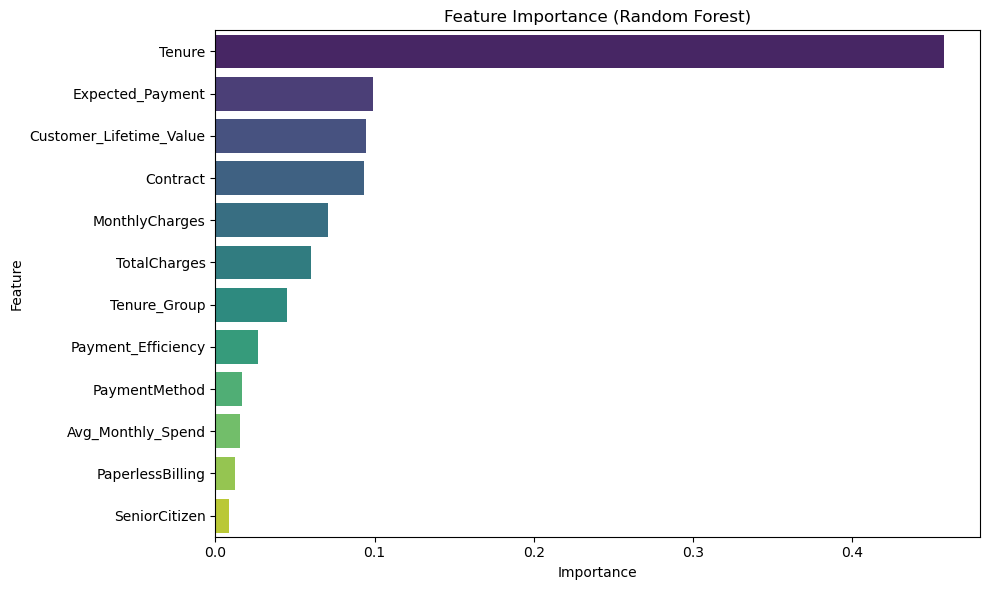

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('customer_churn_feature_engineered_v2.csv')

# Drop identifier
if 'CustomerID' in df.columns:
    df = df.drop(columns=['CustomerID'])

# Separate features and target
target = 'Churn'
X = df.drop(columns=[target])
y = df[target]

# Identify and encode all categorical columns to avoid the "0-1 Year" or similar errors
cat_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    print(f"Encoding column: {col}")
    X[col] = le.fit_transform(X[col].astype(str))

# 1. Correlation Analysis
# Re-attach target for correlation calculation
df_corr = X.copy()
df_corr[target] = y
correlations = df_corr.corr()[target].sort_values(ascending=False)

# 2. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Output results
print("\nCorrelations with Churn:")
print(correlations)

print("\nRandom Forest Feature Importances:")
print(importances)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.savefig('feature_importance_selection.png')

# Save ranking
importances.to_csv('feature_selection_results.csv', index=False)

## Build Pipeline - Create complete preprocessing pipeline, test end-to-end

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

# 1. Load data
df = pd.read_csv('customer_churn (3).csv')

# 2. Define target and features
# Dropping CustomerID as it's not a feature
X = df.drop(columns=['Churn', 'CustomerID'])
y = df['Churn']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Custom Feature Engineering Function
def engineer_features(df_input):
    df_copy = df_input.copy()
    # Customer Lifetime Value
    df_copy['CustomerLifetimeValue'] = df_copy['MonthlyCharges'] * df_copy['Tenure']
    # Payment Efficiency
    df_copy['PaymentEfficiency'] = df_copy['TotalCharges'] / (df_copy['MonthlyCharges'] * df_copy['Tenure'] + 0.1)
    # Tenure to Charge Ratio
    df_copy['TenureToChargeRatio'] = df_copy['Tenure'] / (df_copy['MonthlyCharges'] + 0.1)
    return df_copy

# Use FunctionTransformer to make it compatible with Pipeline
feature_engineer = FunctionTransformer(engineer_features)

# 5. Define Column Transformers
# Identify column groups after engineering
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'CustomerLifetimeValue', 'PaymentEfficiency', 'TenureToChargeRatio', 'SeniorCitizen']
cat_cols = ['PaymentMethod', 'PaperlessBilling']
ord_cols = ['Contract']

# Numerical pipeline: Impute + Scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: Impute + OneHot
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Ordinal pipeline: Impute + Ordinal
ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']]))
])

# Combine into a preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
    ('ord', ord_pipeline, ord_cols)
])

# 6. Build the Complete Pipeline
full_pipeline = Pipeline([
    ('engineer', feature_engineer),
    ('preprocess', preprocessor)
])

# 7. Test End-to-End
# Fit on Training
full_pipeline.fit(X_train)

# Transform Training and Test
X_train_processed = full_pipeline.transform(X_train)
X_test_processed = full_pipeline.transform(X_test)

# Get feature names for the final dataframe
# Get names from OneHotEncoder
ohe_feature_names = full_pipeline.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe'].get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(ohe_feature_names) + ord_cols

# Create DataFrames to visualize results
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)

print("Pipeline Steps Successfully Created:")
for step in full_pipeline.steps:
    print(f"- {step[0]}")

print("\nProcessed Training Data Shape:", X_train_processed_df.shape)
print("\nFirst 5 rows of processed data:")
print(X_train_processed_df.head())

# Save the final training set for model building later
X_train_processed_df['Churn'] = y_train.values
X_train_processed_df.to_csv('final_processed_train_pipeline.csv', index=False)

Pipeline Steps Successfully Created:
- engineer
- preprocess

Processed Training Data Shape: (400, 13)

First 5 rows of processed data:
     Tenure  MonthlyCharges  TotalCharges  CustomerLifetimeValue  \
0  1.035465       -0.482915     -0.164958               0.327582   
1  1.480029       -1.812568      0.728304              -0.896348   
2 -0.545209       -0.193860      1.180937              -0.471680   
3 -0.940377        0.615495     -0.607809              -0.498643   
4 -0.298229       -1.446432      1.525970              -0.949953   

   PaymentEfficiency  TenureToChargeRatio  SeniorCitizen  \
0          -0.296776             0.426755       1.030464   
1           0.125591             6.001809      -0.970437   
2          -0.077074            -0.446062       1.030464   
3          -0.254886            -0.721372      -0.970437   
4           0.373275             0.711579      -0.970437   

   PaymentMethod_Bank Transfer  PaymentMethod_Credit Card  \
0                          0.0   